In [719]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [551]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')

In [552]:
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active,2020-05-14_confirmed,2020-05-14_deaths,2020-05-14_recovered,2020-05-14_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,87.0,93.0,4.0,0.0,89.0,104.0,4.0,0.0,100.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,220.0,231.0,7.0,0.0,224.0,243.0,8.0,0.0,235.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,66.0,69.0,1.0,0.0,68.0,74.0,1.0,0.0,73.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,21.0,0.0,0.0,21.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,99.0,0.0,0.0,99.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [553]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,reopened,days_since_lifted,lifted
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1


In [692]:
sociohealth = pd.read_csv('data/sociohealth.csv')
sociohealth

,FIPS,population_density,%_below_poverty_line,%_disabled,%_minority,%multi_unit_housing,%_overcrowded,%_no_vehicle,%_group_quarters,%_fair_poor_health,...,segregation_index,population,%_female,percentage_rural,pcp_rate,%_65andup,%_uninsured,%_limited_english,%_clinton_votes_2016,%_trump_votes_2016
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,24.0,55416,51.3,42.0,74.0,14.65,8.05,0.80,0.239569,0.734358
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,31.0,208563,51.5,42.3,117.0,19.60,11.10,0.65,0.195653,0.773515
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,22.0,25965,46.9,67.8,69.0,18.00,12.10,1.55,0.466603,0.522714
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,42.0,22643,46.4,68.4,128.0,15.85,9.95,0.35,0.214220,0.769662
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,24.0,57704,50.6,90.0,33.0,17.90,12.50,1.80,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,29.0,44165,48.2,10.9,88.0,10.60,12.00,1.85,0.194046,0.729428
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,27.0,23191,48.4,46.4,229.0,13.55,12.50,3.95,0.600608,0.321945
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,16.0,20773,49.4,43.1,106.0,12.35,12.10,1.00,0.149261,0.764187
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,28.0,8235,49.7,36.0,97.0,20.80,16.20,0.50,0.143203,0.783580


In [693]:
races = pd.read_csv('data/race_df.csv')
races

,FIPS,%_african_american,%_natamer_alaskan,%_asian,%_hawaii_pacisl,%_hisp,%_nonhisp_white
0,1001,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...
3137,56037,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,0.5,1.7,0.8,0.1,13.9,82.6


In [694]:
sociohealth2 = pd.merge(sociohealth, races, how = 'left', on = 'FIPS')
sociohealth2

,FIPS,population_density,%_below_poverty_line,%_disabled,%_minority,%multi_unit_housing,%_overcrowded,%_no_vehicle,%_group_quarters,%_fair_poor_health,...,%_uninsured,%_limited_english,%_clinton_votes_2016,%_trump_votes_2016,%_african_american,%_natamer_alaskan,%_asian,%_hawaii_pacisl,%_hisp,%_nonhisp_white
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [695]:
sociohealth2.to_csv('data/sociohealth2.csv', index = False)

In [696]:
X = state_orders[['order_length','days_since_order', 'days_since_reopen', 'ann_to_eff']]

In [697]:
X = state_orders[['order_length','days_since_order', 'days_since_reopen']]

In [698]:
X = pd.merge(state_orders, sociohealth, how = 'left', on = 'FIPS')

In [699]:
X = pd.merge(state_orders, sociohealth2, how = 'left', on = 'FIPS')

In [700]:
X

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,...,%_uninsured,%_limited_english,%_clinton_votes_2016,%_trump_votes_2016,%_african_american,%_natamer_alaskan,%_asian,%_hawaii_pacisl,%_hisp,%_nonhisp_white
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [688]:
X.columns

Index(['order_length', 'days_since_order', 'days_since_reopen',
       'days_since_lifted', 'population_density', '%_below_poverty_line',
       '%multi_unit_housing', '%_overcrowded', '%_no_vehicle',
       '%_fair_poor_health', '%_smokers', '%_obese', '%_physically_inactive',
       'preventable_hospitalization_rate_medicare', 'air_pollution',
       'age_adjusted_mortality_rate', '%_insufficent_sleep', 'health_costs',
       'med_house_income', 'segregation_index', 'population', '%_female',
       'percentage_rural', '%_65andup', '%_uninsured', '%_limited_english',
       '%_clinton_votes_2016', '%_trump_votes_2016', 'perc_afr_am',
       'perc_nat_am_as', 'perc_asian', 'perc_nh_opi', 'perc_hisp',
       'perc_nonhisp_white'],
      dtype='object')

In [701]:
X.drop(columns = ['FIPS', 'STATE','date_announced','date_effective','date_lift','date_reopen'], inplace = True)

In [702]:
X.drop(columns = ['ann_to_eff', '%_diabetes', '%_unemployed'], inplace = True)

In [703]:
X.drop(columns = ['%_minority'], inplace = True)

In [704]:
X.drop(columns = ['%_disabled', 'pcp_rate', '%_group_quarters', ], inplace = True)

In [705]:
X.drop(columns = ['lifted', 'reopened'], inplace = True)

In [706]:
X

,order_length,days_since_order,days_since_reopen,days_since_lifted,population_density,%_below_poverty_line,%multi_unit_housing,%_overcrowded,%_no_vehicle,%_fair_poor_health,...,%_uninsured,%_limited_english,%_clinton_votes_2016,%_trump_votes_2016,%_african_american,%_natamer_alaskan,%_asian,%_hawaii_pacisl,%_hisp,%_nonhisp_white
0,26,41,15,15,92.859967,15.4,3.8,1.4,5.6,18,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,26,41,15,15,130.901947,10.6,18.3,1.3,3.4,18,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,26,41,15,15,29.132150,28.9,1.3,3.4,9.2,26,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,26,41,15,15,36.190214,14.0,2.4,0.8,6.0,20,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,26,41,15,15,89.395591,14.4,0.9,1.6,4.2,21,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,1,1,14,0,4.231045,12.0,5.5,1.9,2.4,15,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,1,1,14,0,5.769301,7.1,7.5,7.2,2.4,12,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,1,1,14,0,9.899987,12.5,5.8,2.8,3.9,16,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,1,1,14,0,3.631169,12.4,1.1,1.8,5.0,16,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [707]:
X.columns

Index(['order_length', 'days_since_order', 'days_since_reopen',
       'days_since_lifted', 'population_density', '%_below_poverty_line',
       '%multi_unit_housing', '%_overcrowded', '%_no_vehicle',
       '%_fair_poor_health', '%_smokers', '%_obese', '%_physically_inactive',
       'preventable_hospitalization_rate_medicare', 'air_pollution',
       'age_adjusted_mortality_rate', '%_insufficent_sleep', 'health_costs',
       'med_house_income', 'segregation_index', 'population', '%_female',
       'percentage_rural', '%_65andup', '%_uninsured', '%_limited_english',
       '%_clinton_votes_2016', '%_trump_votes_2016', '%_african_american',
       '%_natamer_alaskan', '%_asian', '%_hawaii_pacisl', '%_hisp',
       '%_nonhisp_white'],
      dtype='object')

In [708]:
y = (metadata_byday.iloc[:,-1] > metadata_byday.iloc[:,-5]).astype(int)

In [709]:
y.value_counts()

0    1761
1    1381
dtype: int64

In [710]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [720]:
rfc = RandomForestClassifier(n_estimators = 175, max_features = 10, oob_score = True)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)


0.7786259541984732

In [721]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[377  72]
 [102 235]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       449
           1       0.77      0.70      0.73       337

    accuracy                           0.78       786
   macro avg       0.78      0.77      0.77       786
weighted avg       0.78      0.78      0.78       786

0.7786259541984732


Text(0.5, 0, 'Average contribution of information gain')

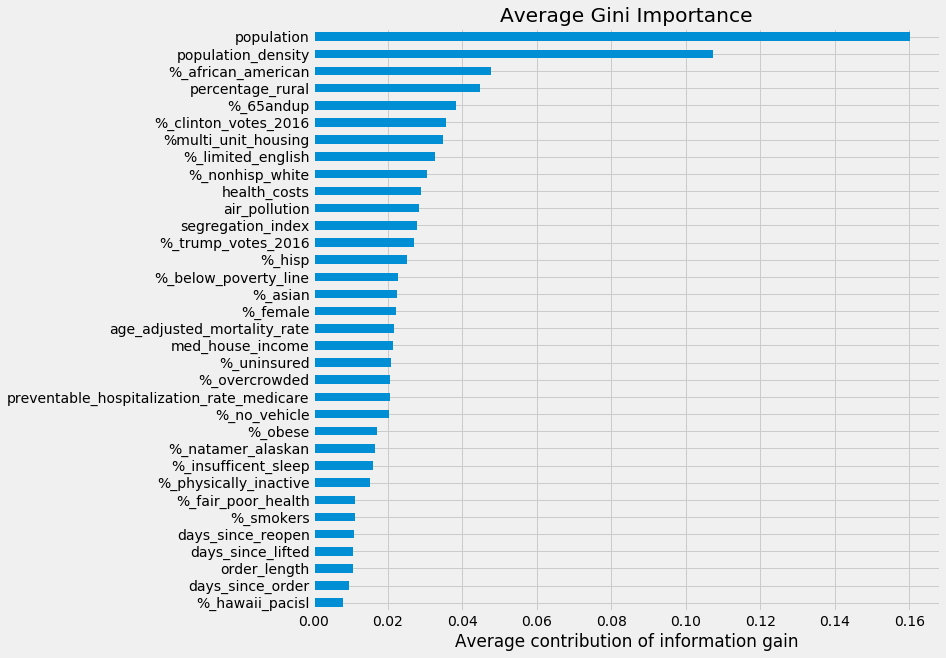

In [712]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(10,10))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

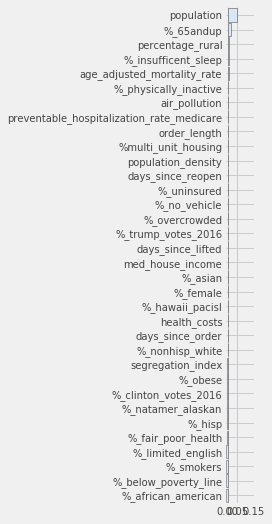

In [713]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [714]:
#rf1 = rfc.fit(X_train1, y_train1)
confusion_matrix(y_test, rfc.predict(X_test))

array([[372,  77],
       [105, 232]])

In [715]:
precision_score(y_test, rfc.predict(X_test))

0.7508090614886731

In [716]:
recall_score(y_test, rfc.predict(X_test))

0.6884272997032641

In [622]:
estimator_list = [50, 75, 100, 125, 150, 175, 200]
score_list = []
for i in estimator_list:
    rfc1 = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc1.fit(X_train, y_train)
    score_list.append(rfc1.score(X_test, y_test))
estimator_scores = dict(zip(estimator_list, score_list))
estimator_scores

{50: 0.7697201017811705,
 75: 0.7735368956743003,
 100: 0.772264631043257,
 125: 0.772264631043257,
 150: 0.7697201017811705,
 175: 0.7811704834605598,
 200: 0.772264631043257}

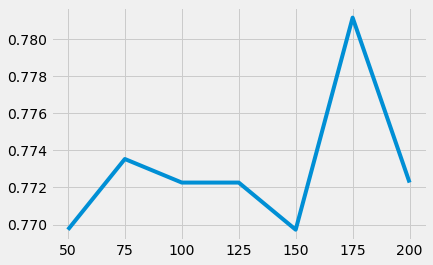

In [623]:
x = estimator_list
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)

In [620]:
max_features = []
score_list = []
for i in range(1, len(X.columns)):
    rfc2 = RandomForestClassifier(max_features=i, oob_score=True)
    rfc2.fit(X_train, y_train)
    score_list.append(rfc2.score(X_test, y_test))
    max_features.append(i)
feature_scores = dict(zip(max_features, score_list))
feature_scores

{1: 0.7684478371501272,
 2: 0.7659033078880407,
 3: 0.7620865139949109,
 4: 0.77735368956743,
 5: 0.7697201017811705,
 6: 0.77735368956743,
 7: 0.7735368956743003,
 8: 0.7748091603053435,
 9: 0.7786259541984732,
 10: 0.7888040712468194,
 11: 0.7760814249363868,
 12: 0.7811704834605598,
 13: 0.7798982188295165,
 14: 0.7798982188295165,
 15: 0.7748091603053435,
 16: 0.7786259541984732,
 17: 0.7748091603053435,
 18: 0.7837150127226463,
 19: 0.7735368956743003,
 20: 0.7798982188295165,
 21: 0.7735368956743003,
 22: 0.7709923664122137,
 23: 0.7735368956743003,
 24: 0.7709923664122137,
 25: 0.7646310432569975,
 26: 0.7811704834605598,
 27: 0.7646310432569975,
 28: 0.772264631043257,
 29: 0.7620865139949109,
 30: 0.77735368956743,
 31: 0.7595419847328244,
 32: 0.7811704834605598,
 33: 0.7659033078880407}

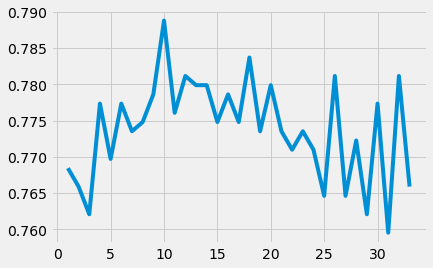

In [621]:
x = max_features
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)